In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Populating the interactive namespace from numpy and matplotlib


In [5]:
y_test[:, i], y_score[:, i]

(array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0]),
 array([ 0.12386354, -0.16612302, -0.32055874,  0.02199789, -0.71889214,
        -0.05859016, -0.79111998, -0.57199363, -0.38933694, -0.27510839,
        -0.27995197,  0.02530178, -0.13456902, -0.45918364, -0.20023832,
        -0.56980985, -0.24297128, -0.31370595, -0.39090964,  0.03129167,
        -0.21423788, -0.51922684,  0.04121338, -0.41072849, -0.12051204,
        -0.57704892, -0.86493066, -0.21682409, -0.49997476, -0.11058011,
        -0.22759345,  0.02046723, -0.45379557, -0.00375631,  0.10106561,
        -0.34020065, -0.41776502,  0.12967625, -0.54610377, -0.35901924,
        -0.30065047, -0.181261  ,  0.00856393, -0.2292247 , -0.2039252 ,
        -0.05831557, -0.01186087,  0.21326435, -0.23302033,  0.58423201,
        -0.

In [4]:
n_classes

3

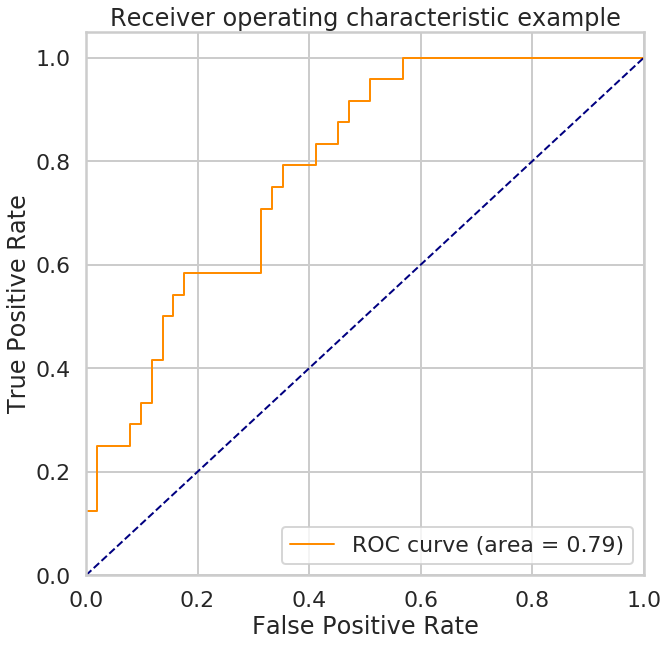

In [3]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")